In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [28]:
from google.colab import files
trainHouseCSV = files.upload()

trainHouse = pd.read_csv('train.csv')
trainHouse.head()

Saving train.csv to train (2).csv


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [29]:
trainHouse.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

<Axes: xlabel='SalePrice', ylabel='Count'>

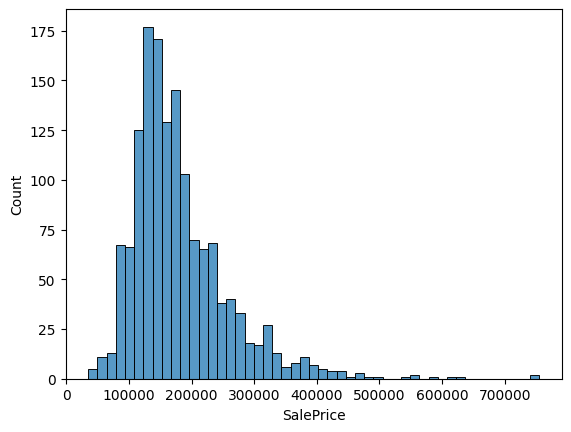

In [30]:
sns.histplot(trainHouse['SalePrice'])

In [31]:
from google.colab import files
testHouseCSV = files.upload()

testHouse = pd.read_csv('test.csv')
testHouse.head()

Saving test.csv to test (1).csv


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [32]:
X = trainHouse.drop('SalePrice', axis=1)
y = trainHouse['SalePrice']

In [33]:
from sklearn.preprocessing import OrdinalEncoder

categorical_cols = X.select_dtypes(include="object").columns
encoder = OrdinalEncoder()
X[categorical_cols] = encoder.fit_transform(X[categorical_cols])

<Axes: >

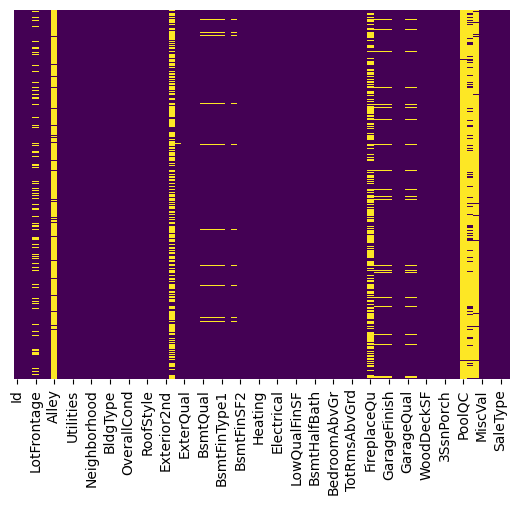

In [34]:
sns.heatmap(X.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [35]:
nan_percentage = trainHouse.isnull().sum() / len(trainHouse) * 100
cols_with_high_nan = nan_percentage[nan_percentage > 50].index.tolist()
print("Columns with more than 50% missing values:")
print(cols_with_high_nan)

Columns with more than 50% missing values:
['Alley', 'MasVnrType', 'PoolQC', 'Fence', 'MiscFeature']


In [36]:
X.drop(['Alley', 'MasVnrType', 'Fence', 'PoolQC', 'MiscFeature'],axis=1,inplace=True)

<Axes: >

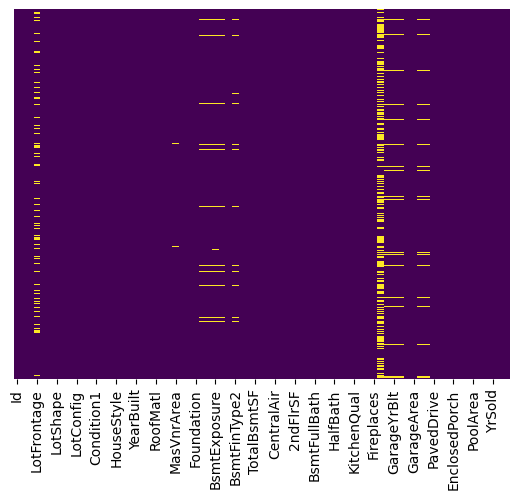

In [37]:
sns.heatmap(X.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [40]:
nan_counts_X = X.isnull().sum()
cols_with_most_nan_X = nan_counts_X.sort_values(ascending=False)
print("Columns in X with the most missing values:")
print(cols_with_most_nan_X)

Columns in X with the most missing values:
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageFinish      81
GarageCond        81
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
Length: 75, dtype: int64


<Axes: >

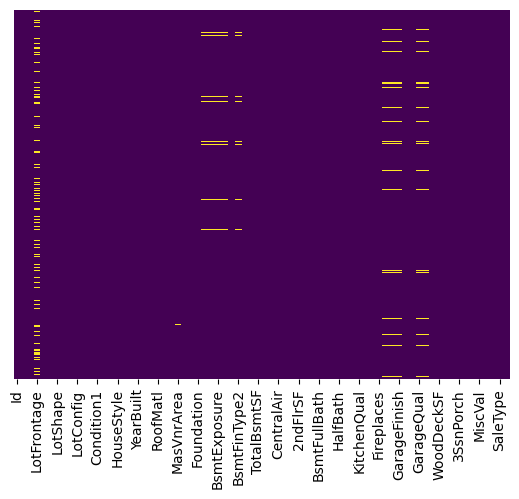

In [41]:
X.drop(['FireplaceQu'],axis=1,inplace=True)
sns.heatmap(X.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [42]:
nan_counts_X = X.isnull().sum()
cols_with_nan_X = nan_counts_X[nan_counts_X > 0]
print("Columns in X with missing values:")
print(cols_with_nan_X)

Columns in X with missing values:
LotFrontage     259
MasVnrArea        8
BsmtQual         37
BsmtCond         37
BsmtExposure     38
BsmtFinType1     37
BsmtFinType2     38
Electrical        1
GarageType       81
GarageYrBlt      81
GarageFinish     81
GarageQual       81
GarageCond       81
dtype: int64


In [43]:
# Calculate correlations with LotFrontage, excluding nulls in LotFrontage
correlation_matrix = X.dropna(subset=['LotFrontage']).corr()['LotFrontage']

# Filter out columns with nulls in the original X DataFrame
non_null_columns = X.columns[X.notnull().all()].tolist()
correlation_with_non_nulls = correlation_matrix.filter(items=non_null_columns)

# Find the column with the highest absolute correlation (excluding LotFrontage itself)
most_correlated_column = correlation_with_non_nulls.abs().sort_values(ascending=False).index[1]

print(f"The column with the highest correlation to LotFrontage that has no nulls is: {most_correlated_column}")

# Define the imputation function
def impute_LotFrontage(df):
    df['LotFrontage'] = df.groupby(most_correlated_column)['LotFrontage'].transform(lambda x: x.fillna(x.mean()))
    return df

# Apply the imputation function to X
X = impute_LotFrontage(X)

# Verify that the nulls in LotFrontage are filled
print("\nMissing values in LotFrontage after imputation:")
print(X['LotFrontage'].isnull().sum())

The column with the highest correlation to LotFrontage that has no nulls is: BldgType

Missing values in LotFrontage after imputation:
0


In [44]:
X.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,3.0,65.0,8450,1.0,3.0,3.0,0.0,4.0,...,61,0,0,0,0,0,2,2008,8.0,4.0
1,2,20,3.0,80.0,9600,1.0,3.0,3.0,0.0,2.0,...,0,0,0,0,0,0,5,2007,8.0,4.0
2,3,60,3.0,68.0,11250,1.0,0.0,3.0,0.0,4.0,...,42,0,0,0,0,0,9,2008,8.0,4.0
3,4,70,3.0,60.0,9550,1.0,0.0,3.0,0.0,0.0,...,35,272,0,0,0,0,2,2006,8.0,0.0
4,5,60,3.0,84.0,14260,1.0,0.0,3.0,0.0,2.0,...,84,0,0,0,0,0,12,2008,8.0,4.0


In [48]:
# Calculate correlations with GarageType, excluding nulls in GarageType
# Using mode for categorical imputation
correlation_matrix_garage = X.dropna(subset=['GarageType']).apply(lambda x: x.astype('category').cat.codes).corr()['GarageType']

# Filter out columns with nulls in the original X DataFrame
non_null_columns = X.columns[X.notnull().all()].tolist()
correlation_with_non_nulls_garage = correlation_matrix_garage.filter(items=non_null_columns)

# Find the column with the highest absolute correlation (excluding GarageType itself)
# Exclude GarageType itself as it's already dropped from X for imputation purposes
most_correlated_column_garage = correlation_with_non_nulls_garage.abs().sort_values(ascending=False).index[0]

print(f"The column with the highest correlation to GarageType that has no nulls is: {most_correlated_column_garage}")

# Define the imputation function for GarageType using mode
def impute_GarageType(df):
    df['GarageType'] = df.groupby(most_correlated_column_garage)['GarageType'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else np.nan))
    return df

# Apply the imputation function to X
X = impute_GarageType(X)

# Verify that the nulls in GarageType are filled
print("\nMissing values in GarageType after imputation:")
print(X['GarageType'].isnull().sum())

The column with the highest correlation to GarageType that has no nulls is: YearBuilt

Missing values in GarageType after imputation:
3


In [50]:
# Calculate correlations with GarageYrBlt, excluding nulls in GarageYrBlt
correlation_matrix_garage_yr = X.dropna(subset=['GarageYrBlt']).corr()['GarageYrBlt']

# Filter out columns with nulls in the original X DataFrame
non_null_columns = X.columns[X.notnull().all()].tolist()
correlation_with_non_nulls_garage_yr = correlation_matrix_garage_yr.filter(items=non_null_columns)

# Find the column with the highest absolute correlation (excluding GarageYrBlt itself)
most_correlated_column_garage_yr = correlation_with_non_nulls_garage_yr.abs().sort_values(ascending=False).index[0]

print(f"The column with the highest correlation to GarageYrBlt that has no nulls is: {most_correlated_column_garage_yr}")

# Define the imputation function for GarageYrBlt using mean
def impute_GarageYrBlt(df):
    df['GarageYrBlt'] = df.groupby(most_correlated_column_garage_yr)['GarageYrBlt'].transform(lambda x: x.fillna(x.mean()))
    return df

# Apply the imputation function to X
X = impute_GarageYrBlt(X)

# Verify that the nulls in GarageYrBlt are filled
print("\nMissing values in GarageYrBlt after imputation:")
print(X['GarageYrBlt'].isnull().sum())

The column with the highest correlation to GarageYrBlt that has no nulls is: YearBuilt

Missing values in GarageYrBlt after imputation:
3


In [52]:
# Define a function to impute missing categorical values using mode based on a grouping column
def impute_categorical_mode(df, columns_to_impute, group_column):
    for col in columns_to_impute:
        df[col] = df.groupby(group_column)[col].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else np.nan))
    return df

# Columns to impute
garage_cols_to_impute = ['GarageFinish', 'GarageQual', 'GarageCond']

# Apply the imputation function to X, grouping by 'YearBuilt'
X = impute_categorical_mode(X, garage_cols_to_impute, 'YearBuilt')

# Verify that the nulls in the specified columns are filled
print("\nMissing values after imputation for GarageFinish, GarageQual, GarageCond:")
print(X[garage_cols_to_impute].isnull().sum())


Missing values after imputation for GarageFinish, GarageQual, GarageCond:
GarageFinish    3
GarageQual      3
GarageCond      3
dtype: int64


<Axes: >

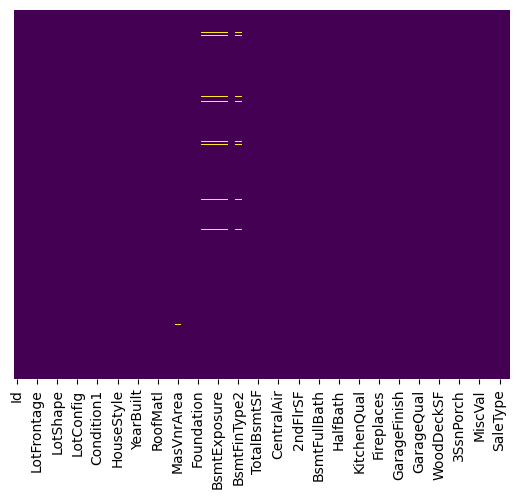

In [53]:
sns.heatmap(X.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [54]:
nan_counts_X = X.isnull().sum()
cols_with_nan_X = nan_counts_X[nan_counts_X > 0]
print("Columns in X with missing values:")
print(cols_with_nan_X)

Columns in X with missing values:
MasVnrArea       8
BsmtQual        37
BsmtCond        37
BsmtExposure    38
BsmtFinType1    37
BsmtFinType2    38
Electrical       1
GarageType       3
GarageYrBlt      3
GarageFinish     3
GarageQual       3
GarageCond       3
dtype: int64


In [55]:
# Impute numerical column with mean
X['MasVnrArea'].fillna(X['MasVnrArea'].mean(), inplace=True)

# Impute categorical columns with mode
categorical_cols_to_impute = ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond']
for col in categorical_cols_to_impute:
    X[col].fillna(X[col].mode()[0] if not X[col].mode().empty else np.nan, inplace=True)


# Verify that the nulls are filled
print("\nMissing values after imputation:")
print(X.isnull().sum()[X.isnull().sum() > 0])


Missing values after imputation:
Series([], dtype: int64)


/tmp/ipython-input-55-115029211.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X['MasVnrArea'].fillna(X['MasVnrArea'].mean(), inplace=True)
/tmp/ipython-input-55-115029211.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplac

In [56]:
nan_counts_X = X.isnull().sum()
cols_with_nan_X = nan_counts_X[nan_counts_X > 0]
print("Columns in X with missing values:")
print(cols_with_nan_X)

Columns in X with missing values:
Series([], dtype: int64)


<Axes: >

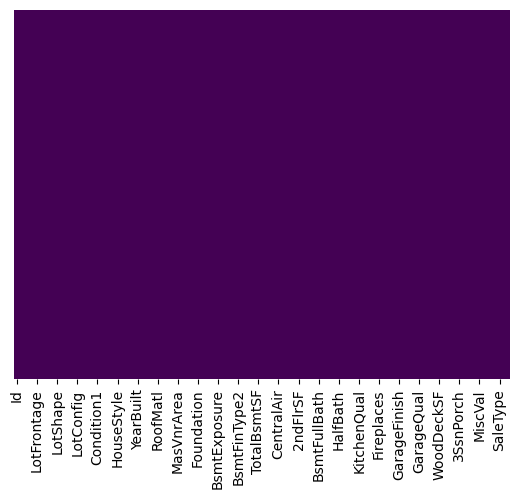

In [57]:
sns.heatmap(X.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [59]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [60]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [61]:
predictions = lm.predict(X_test)

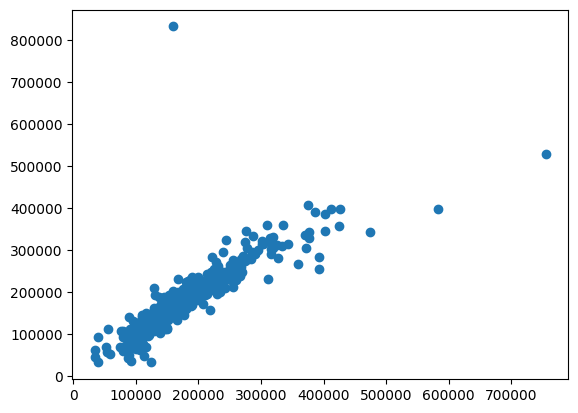

In [62]:
plt.scatter(y_test,predictions)

In [70]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Scale the data before applying SVR
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train the SVR model
svr_model = SVR(kernel='linear') # You can change the kernel as needed (e.g., 'rbf')
svr_model.fit(X_train_scaled, y_train)

# Make predictions
predictions_svr = svr_model.predict(X_test_scaled)

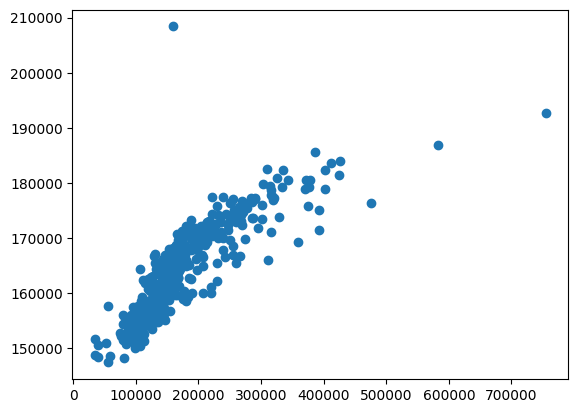

In [71]:
plt.scatter(y_test,predictions_svr)

In [67]:
from sklearn.ensemble import RandomForestRegressor

# Create and train the Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=150, random_state=101) # You can adjust n_estimators
rf_model.fit(X_train, y_train)

# Make predictions
predictions_rf = rf_model.predict(X_test)

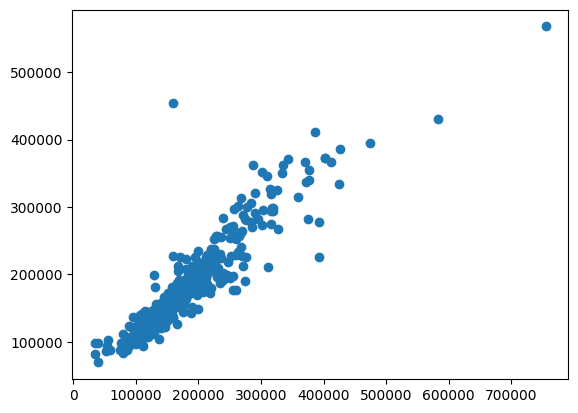

In [66]:
plt.scatter(y_test,predictions_rf)

In [94]:
from xgboost import XGBRegressor

# Create and train the XGBoost model
xgb_model = XGBRegressor(n_estimators=1000, learning_rate=0.05, random_state=101)
xgb_model.fit(X_train, y_train)

# Make predictions
predictions_xgb = xgb_model.predict(X_test)

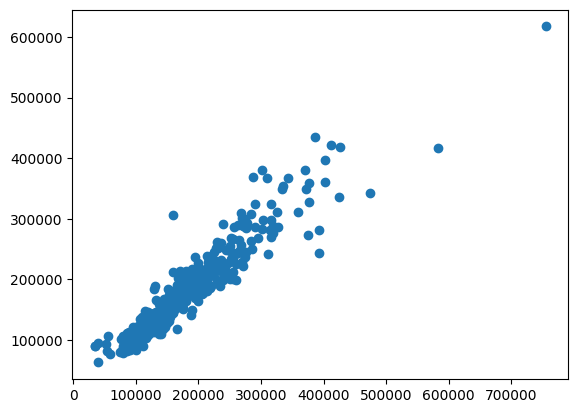

In [95]:
plt.scatter(y_test,predictions_xgb)

In [77]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Evaluate Linear Regression
mae_lr = mean_absolute_error(y_test, predictions)
rmse_lr = np.sqrt(mean_squared_error(y_test, predictions))
print(f"Linear Regression MAE: {mae_lr}")
print(f"Linear Regression RMSE: {rmse_lr}")

# Evaluate SVR
mae_svr = mean_absolute_error(y_test, predictions_svr)
rmse_svr = np.sqrt(mean_squared_error(y_test, predictions_svr))
print(f"SVR MAE: {mae_svr}")
print(f"SVR RMSE: {rmse_svr}")

# Evaluate Random Forest Regressor
mae_rf = mean_absolute_error(y_test, predictions_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, predictions_rf))
print(f"Random Forest Regressor MAE: {mae_rf}")
print(f"Random Forest Regressor RMSE: {rmse_rf}")

# Evaluate XGBoost Regressor
mae_xgb = mean_absolute_error(y_test, predictions_xgb)
rmse_xgb = np.sqrt(mean_squared_error(y_test, predictions_xgb))
print(f"\nTHE BEST\nXGBoost Regressor MAE: {mae_xgb}")
print(f"XGBoost Regressor RMSE: {rmse_xgb}")

print(f"\n\nNilai terendah rumah: {trainHouse['SalePrice'].min()}")
print(f"Nilai tertinggi rumah: {trainHouse['SalePrice'].max()}")

Linear Regression MAE: 20622.6552078391
Linear Regression RMSE: 43473.238449390265
SVR MAE: 48977.21191484123
SVR RMSE: 74022.68335653425
Random Forest Regressor MAE: 18113.918234398785
Random Forest Regressor RMSE: 31382.069768470694

THE BEST
XGBoost Regressor MAE: 17057.474609375
XGBoost Regressor RMSE: 26987.798131748354


Nilai terendah rumah: 34900
Nilai tertinggi rumah: 755000


In [78]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.preprocessing import StandardScaler

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build the ANN model
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dense(1)) # Output layer for regression

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=0)

# Evaluate the model
loss, mae = model.evaluate(X_test_scaled, y_test, verbose=0)
print(f"ANN Test Loss (MSE): {loss}")
print(f"ANN Test MAE: {mae}")

# Make predictions
predictions_ann = model.predict(X_test_scaled)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


ANN Test Loss (MSE): 3106286080.0
ANN Test MAE: 29724.8203125
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


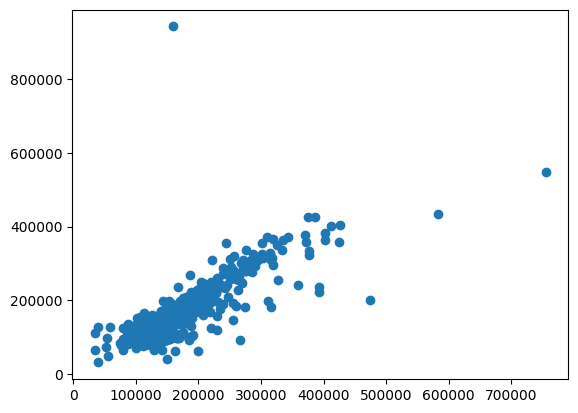

In [79]:
plt.scatter(y_test,predictions_ann)